# Challenges and Applications of Large Language Models
Jean Kaddour, Joshua Harris, Maximilian Mozes, Herbie Bradley, Roberta Raileanu, and Robert McHardy

## Toy Examples of Challenges & Basic Application Examples
Prepared by Sophia Tannir and Rachel Montgomery

# Challenges and Solutions

## Major Problem: Unfathomable Datasets (Section 2.1)

### Identifying Near-Duplicates
- Problem: Large datasets often contain near-duplicate documents, which can skew results and waste computational resources
- Addressed with: Techniques such as MinHash and NearDup can efficiently identify near-duplicates by grouping documents based on similarity measures, reducing the computational load and improving the dataset's quality

In [2]:
from collections import defaultdict

# Simulate a small dataset
documents = [
    "This is a sample document.",
    "This is a sample document with a slight variation.",
    "Another distinct document.",
    "This is a Sample document."
]

# Naive approach to identify near-duplicates
def naive_hash(doc):
    return hash("".join(sorted(doc.lower().split())))

# Group documents by their naive hash
groups = defaultdict(list)
for doc in documents:
    groups[naive_hash(doc)].append(doc)

# Identify potential near-duplicates
for group in groups.values():
    if len(group) > 1:
        print("Found near-duplicates:", group)

Found near-duplicates: ['This is a sample document.', 'This is a Sample document.']


### Benchmark Data Contamination
- Problem: Overlap between training and test documents can lead to overfitting, where the model performs well on test data due to memorization rather than generalization
- Addressed with: Similarity measures can flag training documents that share too many words with any test document, helping to prevent data contamination and ensure more reliable model evaluation. However, these measures can be computationally intensive and much more complex than what we see here in the toy example

In [3]:
def simple_similarity(doc1, doc2):
    words_doc1 = set(doc1.lower().split())
    words_doc2 = set(doc2.lower().split())
    common_words = words_doc1.intersection(words_doc2)
    return len(common_words) / max(len(words_doc1), len(words_doc2))

training_docs = ["This is a training document.", "Another training example."]
test_docs = ["A test document.", "This training document is a test example."]

# Flag training documents that share too many words with any test document
for train_doc in training_docs:
    for test_doc in test_docs:
        if simple_similarity(train_doc, test_doc) > 0.5:  # Using a threshold of 50% similarity
            print(f"Potential overlap found: \"{train_doc}\" and \"{test_doc}\"")

Potential overlap found: "This is a training document." and "This training document is a test example."


### Filtering Personal Identifying Information
- Problem: Datasets may contain sensitive information that should not be disclosed, such as email addresses, posing privacy concerns
- Solved with: Regular expressions (regex) can be used to identify and filter out PII, replacing it with generic placeholders to protect individual privacy while maintaining the utility of the dataset. Further problems arise with LLMs when these regular expressions fail to capture the vast breadth of possible PII

In [4]:
import re

def filter_pii(text):
    # Simple regex for demonstration purposes
    email_regex = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    return email_regex.sub("[EMAIL]", text)

document_with_pii = "Contact us at info@example.com for more information."
filtered_document = filter_pii(document_with_pii)

print(filtered_document)

Contact us at [EMAIL] for more information.


### Analyzing Pre-Training Domain Mixtures
- Problem: The composition of pre-training data across different domains can significantly impact model performance on downstream tasks, introducing bias towards the more well-represented domains
- Addressed with: Analyzing the frequency and proportion of documents from each domain in the pre-training dataset allows for adjusting the domain mix to create a more balanced and representative dataset, potentially improving model performance on a wider range of tasks

In [5]:
from collections import Counter

# Simulated document domains
documents = ["science", "news", "science", "blog", "news", "blog", "science"]

# Count the frequency of each domain
domain_counts = Counter(documents)
total_documents = len(documents)

# Calculate and print proportions
for domain, count in domain_counts.items():
    proportion = count / total_documents
    print(f"Domain: {domain}, Proportion: {proportion}")

Domain: science, Proportion: 0.42857142857142855
Domain: news, Proportion: 0.2857142857142857
Domain: blog, Proportion: 0.2857142857142857


### Balancing Fine-Tuning Task Mixtures
- Problem: Imbalance in task-specific data can lead to models that perform well on tasks with more data at the expense of those with less
- Addressed with: Ensuring each task has equal representation in the training data, either by sampling or weighting, can help achieve better performance across all tasks, leading to a more versatile and fair model. Here, we look at balancing, but weighting can be more appropriate when you're hoping to avoid "throwing out" too much data

In [6]:
task_data = {
    "task1": ["data1", "data2"],
    "task2": ["data3", "data8", "data9", "data10", "data11"],
    "task3": ["data4", "data5", "data6", "data7"]
}

# Ensure each task has a more equal representation
balanced_dataset = []
for task, data in task_data.items():
    balanced_dataset.extend(data[:3])  # Limiting to 3 data points per task for simplicity

print("Balanced Dataset:", balanced_dataset)

Balanced Dataset: ['data1', 'data2', 'data3', 'data8', 'data9', 'data4', 'data5', 'data6']


## Tasks Not Solvable By Scale
- Problem: Not all tasks benefit equally from increasing model size; some tasks may see diminishing returns or even performance degradation as model size increases
- Addressed with: Model training must be improved, either via hyperparameters, model selection, or more relevant data. Increasing the amount of data does not help, but the specificity of the data could improve the model performance instead

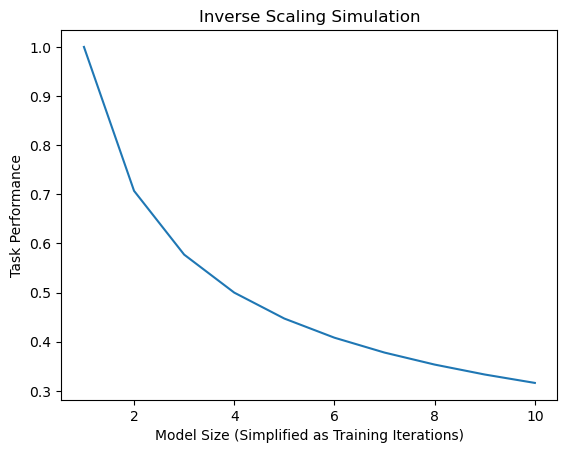

In [7]:
import matplotlib.pyplot as plt

# Simulate model performance over "model sizes"
model_sizes = range(1, 11)  # Simplified as training iterations
task_performance = [1/(size**0.5) for size in model_sizes]  # Simplifying IS as performance degradation

plt.plot(model_sizes, task_performance)
plt.xlabel('Model Size (Simplified as Training Iterations)')
plt.ylabel('Task Performance')
plt.title('Inverse Scaling Simulation')
plt.show()

## Major Problem: High Inference Latency (Section 2.5)

### LoRA
- Problem: Larger models can suffer from high inference latency, making them impractical for real-time applications
- Addressed with: Techniques like Low-Rank Adaptation update the model's weights with low-rank matrices, reducing the computational cost without significantly compromising performance, making large models more practical for real-time use

In [8]:
import numpy as np

# Original weight matrix W of size (m, n)
m, n = 10, 10
W = np.random.randn(m, n)

# Low-rank matrices B and A of size (m, r) and (r, n), where r << m, n
r = 2
B = np.random.randn(m, r)
A = np.random.randn(r, n)

# Low-rank update
W_updated = W + B @ A

print("Original W:\n", W)
print("Updated W:\n", W_updated)

Original W:
 [[ 7.86175296e-01 -2.40382595e-01  7.37132970e-01  2.61114227e-01
   2.20027136e+00  4.29692698e-01 -8.98811063e-01 -1.37869582e+00
  -4.88466651e-01  1.88288235e+00]
 [ 2.31796411e-01  2.61867732e-02 -1.26906669e-01  1.10090015e+00
  -9.90902735e-01  4.44747803e-01 -5.14177130e-01 -3.21220478e-01
   7.03201620e-01 -1.52771350e+00]
 [-1.23645652e-03 -1.44792104e+00  8.95959345e-01 -2.50877795e+00
   1.14351078e+00  1.93724332e+00 -7.90529546e-01  2.12666121e+00
   1.59779387e+00  2.22689602e-01]
 [-1.11843217e+00  2.99492328e-01 -7.07361382e-01 -4.60237040e-01
   1.91154977e-01  4.56019575e-01 -1.69030281e-01 -1.57363384e+00
   9.16301655e-01  7.80121738e-01]
 [ 6.75210765e-01 -6.95375802e-01  2.68261572e-01  7.12207394e-01
  -1.21884923e+00  1.85718644e-01  7.84440184e-01  8.53617725e-01
  -7.76813270e-01 -8.80922502e-02]
 [ 1.24988568e+00  1.67280862e+00 -5.43048132e-01 -1.11260472e+00
  -1.36498327e-01 -5.12030503e-01 -1.42462618e+00 -2.25239300e-01
   3.72740713e-01 -4

### Quantization
- Problem: Floating-point operations are computationally expensive and can be a bottleneck for model deployment, especially on devices with limited processing power
- Addressed with: Quantization reduces the precision of the model's weights from floating-point to integer values, significantly speeding up inference and reducing memory footprint while maintaining acceptable levels of accuracy

In [9]:
# Floating-point weights
weights_fp = np.random.randn(5)

# Quantize to 8-bit integer
weights_quantized = np.round(255 * (weights_fp - weights_fp.min()) / (weights_fp.max() - weights_fp.min())).astype(np.uint8)

print("Floating-point weights:", weights_fp)
print("Quantized weights:", weights_quantized)

Floating-point weights: [-0.27183989  1.46579243 -1.45873896 -0.54156054 -1.26480264]
Quantized weights: [103 255   0  80  17]


### Pruning
- Problem: Many parameters in an LLM may be redundant, contributing little to the model's output
- Addressed with: Pruning identifies and removes these redundant parameters, resulting in a sparser and more efficient model without a significant loss in performance, improving inference speed and reducing model size

In [10]:
# Artificial weights
weights = np.random.randn(10)

# Pruning threshold
threshold = np.percentile(np.abs(weights), 50)  # Prune 50% of the weights

# Apply pruning
weights_pruned = np.where(np.abs(weights) < threshold, 0, weights)

print("Original weights:", weights)
print("Pruned weights:", weights_pruned)

Original weights: [ 1.50874495 -0.0941763   0.18153156  0.90861614 -0.40557509 -1.24417269
 -0.35004879 -1.26672088  1.49360942  0.34050332]
Pruned weights: [ 1.50874495  0.          0.          0.90861614  0.         -1.24417269
  0.         -1.26672088  1.49360942  0.        ]


### Mixture of Experts
- Problem: A single model architecture may not be optimal for all types of input data, leading to inefficiencies
- Addressed with: A Mixture of Experts approach uses a router to dynamically select the most appropriate expert model for a given input, combining the strengths of different models to improve overall performance and efficiency

In [11]:
def expert1(x):
    return x * 2

def expert2(x):
    return x ** 2

def router(x):
    # Simple routing logic based on the input value
    return expert1 if x < 5 else expert2

# Test inputs
inputs = [1, 5, 10]

for x in inputs:
    selected_expert = router(x)
    print(f"Input: {x}, Selected Expert: {selected_expert.__name__}, Output: {selected_expert(x)}")

Input: 1, Selected Expert: expert1, Output: 2
Input: 5, Selected Expert: expert2, Output: 25
Input: 10, Selected Expert: expert2, Output: 100


## Application Example

### Data Generation

In [18]:
from transformers import pipeline, set_seed
import random

In [31]:
generator = pipeline('text-generation', model='gpt2', max_length=100)
set_seed(42)

In [32]:
prompts = {
    'positive': [
        "A customer recently bought a high-quality backpack for hiking. They were amazed by its durability and comfort. What might they say in a review?",
        "Imagine a customer bought a new smartphone that exceeded their expectations in performance and camera quality. Write a positive review they might leave.",
        "A customer purchased a kitchen gadget that significantly simplified their cooking process. They found it incredibly useful and time-saving. Describe their positive feedback."
    ],
    'negative': [
        "A customer was disappointed with a pair of headphones they purchased online due to poor sound quality and comfort. Write the review they might leave.",
        "Someone bought a smartwatch but found its battery life to be much shorter than advertised and had issues with its fitness tracking accuracy. Detail their negative review.",
        "A user experienced frequent malfunctions with their new coffee maker, which often made weaker coffee than expected. Describe the negative review they might post."
    ]
}

In [33]:
n_examples = 5

In [38]:
synthetic_data = []
for sentiment, scenarios in prompts.items():
    for scenario in scenarios:
        generated = generator(scenario, num_return_sequences=1)
        text = generated[0]['generated_text'].split(scenario)[-1].strip()  # Extract the generated part
        synthetic_data.append((text, sentiment))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [39]:
for text, sentiment in synthetic_data:
    print(f"Sentiment: {sentiment}, Text: {text}\n")

Sentiment: positive, Text: 

Sentiment: positive, Text: Read the product reviews that describe your iPhone's hardware and software. Are there any complaints about video playback performance? How many people do you currently see on-screen? Please share your experiences (both positive and negative). A good summary of your experience is published in a separate site at www.phonereviews.com, and any feedback and suggestions that you may receive after reading

Sentiment: positive, Text: "You have a computer and cooking software so you can cook in a very simple way. You do not have to spend more than two hours cooking your vegetables. You can do everything you need to do at home."

Duke College's website explains the utility of having an electronics shop with free shipping.

"Everything you need to

Sentiment: negative, Text: Rated 4 out of 5 by JK from Very soft on the ear that I got. So they don't sound too nice on I love them but have a problem with them at my ears where they play fine at 